# **Car Price Prediction with AWS MLOps**

## Local Development Setup

For this assignment, I set up the local development environment on a Mac M1 Pro using Miniconda. I followed these specific steps to ensure that all necessary Python packages and Jupyter functionalities were available:

1. **Create a Conda Environment**:
    
    ```bash
    conda create --name car-price-pred-mlops python
    ```
    
    This command creates a new Conda environment named **`car-price-pred-mlops`**. It's isolated from other environments, ensuring that package dependencies do not interfere with those in different projects.
    
2. **Activate the Environment**:
    
    ```bash
    conda activate car-price-pred-mlops
    ```
    
    Activating the environment makes it the current working environment, which means all Python and command-line operations take place within this environment.
    
3. **Install Jupyter Notebook**:
    
    ```bash
    conda install jupyter
    ```
    
    Jupyter Notebook is installed in the environment, which is a powerful tool for interactive coding and visualization, often used in data science and machine learning projects.
    
4. **Install IPython Kernel**:
    
    ```bash
    conda install ipykernel
    ```
    
    This command installs the IPython kernel, which allows Jupyter to run Python code. The kernel acts as the backend that processes the code written in the notebook.
    
5. **Set up IPython Kernel for the Environment**:
    
    ```bash
    python -m ipykernel install --user --name car-price-pred-mlops --display-name "Car Price Prediction MLOps"
    ```
    
    This step registers the newly created Conda environment in Jupyter under the name "Car Price Prediction MLOps". It allows the environment to be selected as the kernel in Jupyter notebooks, ensuring that notebooks use the specific environment's settings and installed packages.
    
6. **Launch Jupyter Notebook**:
    
    ```bash
    jupyter notebook
    ```
    
    This command starts the Jupyter Notebook server locally in your browser, from where you can create and manage your notebooks.

In [1]:
!pip install --quiet pandas numpy matplotlib seaborn statsmodels scipy scikit-learn boto3

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Confirming that the libraries have been imported correctly
print("Libraries have been successfully imported!")

Libraries have been successfully imported!


# **Phase 1: Exploratory Data Analysis (EDA)**

In this phase, I performed Exploratory Data Analysis (EDA) on the Car Price Prediction dataset using a suite of standard templates that I have developed. This practice is standard whenever I approach a data science problem. The initial investigation and cleaning process are crucial for refining the provided Python script. This involves adding the necessary preprocessing steps required for creating an accurate predictive model. The goal of this phase is to prepare a clean and well-understood dataset, ensuring that it is ready for subsequent feature engineering and model development steps.

## EDA Objectives
The following key tasks are executed to achieve a comprehensive understanding and preparation of the dataset:

- **List of Columns**: Identify all columns in the dataset to understand the features available.
- **Dataset Shape**: Determine the size of the dataset to understand the scope of data.
- **Data Types**: Ascertain the data types of each column to identify any necessary conversions.
- **Unique Values**: List all unique values in each column to detect any anomalies or irregularities.
- **Convert Data Types**: Adjust the data types of specific columns as necessary for proper analysis.
- **Handling Missing Values**: Identify and address any missing data in the dataset.
- **Summary Statistics**: Generate summary statistics of numeric columns to gain insights into the distribution and central tendencies of the data.

In [3]:
# Load the dataset
df = pd.read_csv("../model/train.csv")

# Display the first few rows of the dataframe
df.head(10)

,Unnamed: 0,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,SellingPrice,Age
0,1,46986,Diesel,3,0,90,1,2000,1165,13500,23
1,7,94612,Diesel,3,0,90,1,2000,1245,16900,27
2,9,19700,Petrol,3,0,192,0,1800,1185,21500,27
3,12,43610,Petrol,3,0,192,0,1800,1185,19950,22
4,15,34131,Petrol,3,0,192,1,1800,1185,22500,32
5,17,34000,Petrol,3,0,192,1,1800,1185,22750,30
6,18,21716,Petrol,3,0,110,1,1600,1105,17950,24
7,19,25563,Petrol,3,0,110,0,1600,1065,16750,24
8,21,67660,Petrol,3,0,110,1,1600,1105,15950,30
9,22,43905,Petrol,3,1,110,0,1600,1170,16950,29


In [4]:
# Display the columns in the DataFrame
df.columns.tolist()

['Unnamed: 0',
 'Kilometeres',
 'Fuel_Type',
 'Doors',
 'Automatic',
 'HorsePower',
 'MetallicCol',
 'CC',
 'Wt',
 'SellingPrice',
 'Age']

In [5]:
# Droping index col
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# Display the size of the DataFrame (rows, columns)
df.shape

(958, 10)

In [7]:
# Display data types of columns
df.dtypes

Kilometeres      int64
Fuel_Type       object
Doors            int64
Automatic        int64
HorsePower       int64
MetallicCol      int64
CC               int64
Wt               int64
SellingPrice     int64
Age              int64
dtype: object

In [8]:
# check for all unique values in each column
for column in df.columns:
    print(f"Unique values in '{column}':", df[column].unique()[:20])
    print("Number of unique values:", len(df[column].unique()), "\n\n")

Unique values in 'Kilometeres': [46986 94612 19700 43610 34131 34000 21716 25563 67660 43905 56349 32220
 25813 34545 41415 44142  9750 35199 43000 25000]
Number of unique values: 862 


Unique values in 'Fuel_Type': ['Diesel' 'Petrol' 'CNG']
Number of unique values: 3 


Unique values in 'Doors': [3 5 4 2]
Number of unique values: 4 


Unique values in 'Automatic': [0 1]
Number of unique values: 2 


Unique values in 'HorsePower': [ 90 192 110  97  71 116  69  72  86 107  73]
Number of unique values: 11 


Unique values in 'MetallicCol': [1 0]
Number of unique values: 2 


Unique values in 'CC': [2000 1800 1600 1400 1995 1598 1900 1398 1300 1587 1975 1332]
Number of unique values: 12 


Unique values in 'Wt': [1165 1245 1185 1105 1065 1170 1120 1100 1255 1110 1180 1195 1130 1075
 1115 1265 1260 1125 1155 1480]
Number of unique values: 52 


Unique values in 'SellingPrice': [13500 16900 21500 19950 22500 22750 17950 16750 15950 16950 16250 17495
 15750 12950 14950 14750 13950 15800 205

In [9]:
# Check for missing values after conversion
missing_values = df.isnull().sum()
print("Missing Values After Conversion:\n", missing_values)

Missing Values After Conversion:
 Kilometeres     0
Fuel_Type       0
Doors           0
Automatic       0
HorsePower      0
MetallicCol     0
CC              0
Wt              0
SellingPrice    0
Age             0
dtype: int64


In [10]:
# Display summary statistics for numerical columns
df.describe()

,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,SellingPrice,Age
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,69067.598121,4.009395,0.056367,101.549061,0.669102,1566.651357,1072.701461,10666.893528,56.463466
std,37082.673742,0.955059,0.230750,14.556315,0.470782,184.850459,55.235835,3633.781940,18.332019
min,1.000000,2.000000,0.000000,69.000000,0.000000,1300.000000,1000.000000,4400.000000,1.000000
25%,43472.000000,3.000000,0.000000,90.000000,0.000000,1400.000000,1040.000000,8450.000000,44.000000
50%,63547.000000,4.000000,0.000000,110.000000,1.000000,1600.000000,1065.000000,9900.000000,61.000000
75%,87580.000000,5.000000,0.000000,110.000000,1.000000,1600.000000,1085.000000,11750.000000,70.000000
max,243000.000000,5.000000,1.000000,192.000000,1.000000,2000.000000,1615.000000,32500.000000,80.000000


In [11]:
# recheck data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Kilometeres   958 non-null    int64 
 1   Fuel_Type     958 non-null    object
 2   Doors         958 non-null    int64 
 3   Automatic     958 non-null    int64 
 4   HorsePower    958 non-null    int64 
 5   MetallicCol   958 non-null    int64 
 6   CC            958 non-null    int64 
 7   Wt            958 non-null    int64 
 8   SellingPrice  958 non-null    int64 
 9   Age           958 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 75.0+ KB


## Insights for EDA

**Categorical Variables**

In the given dataset, the following variables are considered categorical as these variables are used to group data into categories where each category is distinct and has no inherent numerical relationship with the others.

- **Fuel_Type**: Includes categories like 'Diesel', 'Petrol', and 'CNG'. Used as categorical due to distinct fuel types influencing car performance and pricing.
- **Doors**: Represents the number of doors (2, 3, 4, 5) and is treated as categorical to differentiate car body styles.
- **Automatic**: Binary variable (0 for manual, 1 for automatic), distinguishing between transmission types.
- **MetallicCol**: Binary variable (0 for non-metallic, 1 for metallic), indicating the presence of a metallic paint finish.


**Numerical Variables:**

Below variables can be identified as numerical variable as they provide quantitative measures that are essential for calculations and model estimations in machine learning. 

- **Kilometers**: A continuous variable showing the car's mileage, which directly influences car value and usage characteristics.
- **HorsePower**: Measures the engine power in horsepower, a continuous quantity impacting car performance.
- **CC**: Engine capacity in cubic centimeters, treated as numerical to quantify engine size.
- **Wt** (Weight): The weight of the car in kilograms, a continuous numerical measure relevant to vehicle dynamics and efficiency.
- **SellingPrice**: Often the target variable, representing the price at which the car is sold, treated as a continuous numerical variable.
- **Age**: Represents the age of the car in years. Although it could be ordinal, it is treated as numerical due to its direct quantitative impact on the car's value and condition.


## Data Visualization

Data visualization is a crucial phase in data analysis for identifying patterns, relationships, and gathering insights that may not be apparent from raw data alone. Effective visualizations can illuminate trends and provide a clearer understanding of the data set's dynamics, particularly in relation to car price. To comprehensively explore the data, various visualization techniques are employed, each serving distinct purposes in the analysis:

- **Kernel Density Estimate (KDE) Plots**: Useful for understanding the distribution of numerical data.
- **Q-Q Plots**: Help assess if a dataset is distributed a certain way, typically gaussian.
- **Histograms**: Ideal for visualizing the distribution of data and observing the shape.
- **Boxplots**: Provide a graphical representation of the numerical data through their quartiles and are especially useful for detecting outliers.
- **Scatter Plots**: Highlight correlations or dependencies between two variables.
- **Heatmaps**: Useful for visualizing the correlation matrix of variables.
- **Count Plots**: Excellent for visualizing categorical data distributions.


### Plotting Detailed Visualizations
To further analyze and visualize the data, specific Python code leveraging `matplotlib` and `seaborn` libraries is employed. The code snippets enhance the aesthetics and provide detailed insight for each numerical column in the dataset.

### Insights Derived from KDE Plots
Initial observations from Kernel Density Estimate (KDE) plots include:
1. **Kilometers**: The KDE plot for Kilometres shows a right-skewed distribution, indicating that most of the cars have lower mileage, with few cars having high mileage.
2. **HorsePower**: The HorsePower distribution is multi-modal with specific peaks, suggesting clusters around common horsepower ratings for cars.
3. **CC (Engine Size)**: The distribution shows multiple peaks, which may indicate common engine sizes. It is right-skewed, suggesting smaller engine sizes are more prevalent.
4. **WT (Weight)**: The weight distribution appears normally distributed with a single peak, indicating most cars have a weight around this central value.
5. **SellingPrice**: The SellingPrice is right-skewed, suggesting that most cars are clustered around a lower price range with fewer high-priced cars.
6. **Age**: The car age distribution is also right-skewed, indicating that there are more newer cars and fewer older cars.

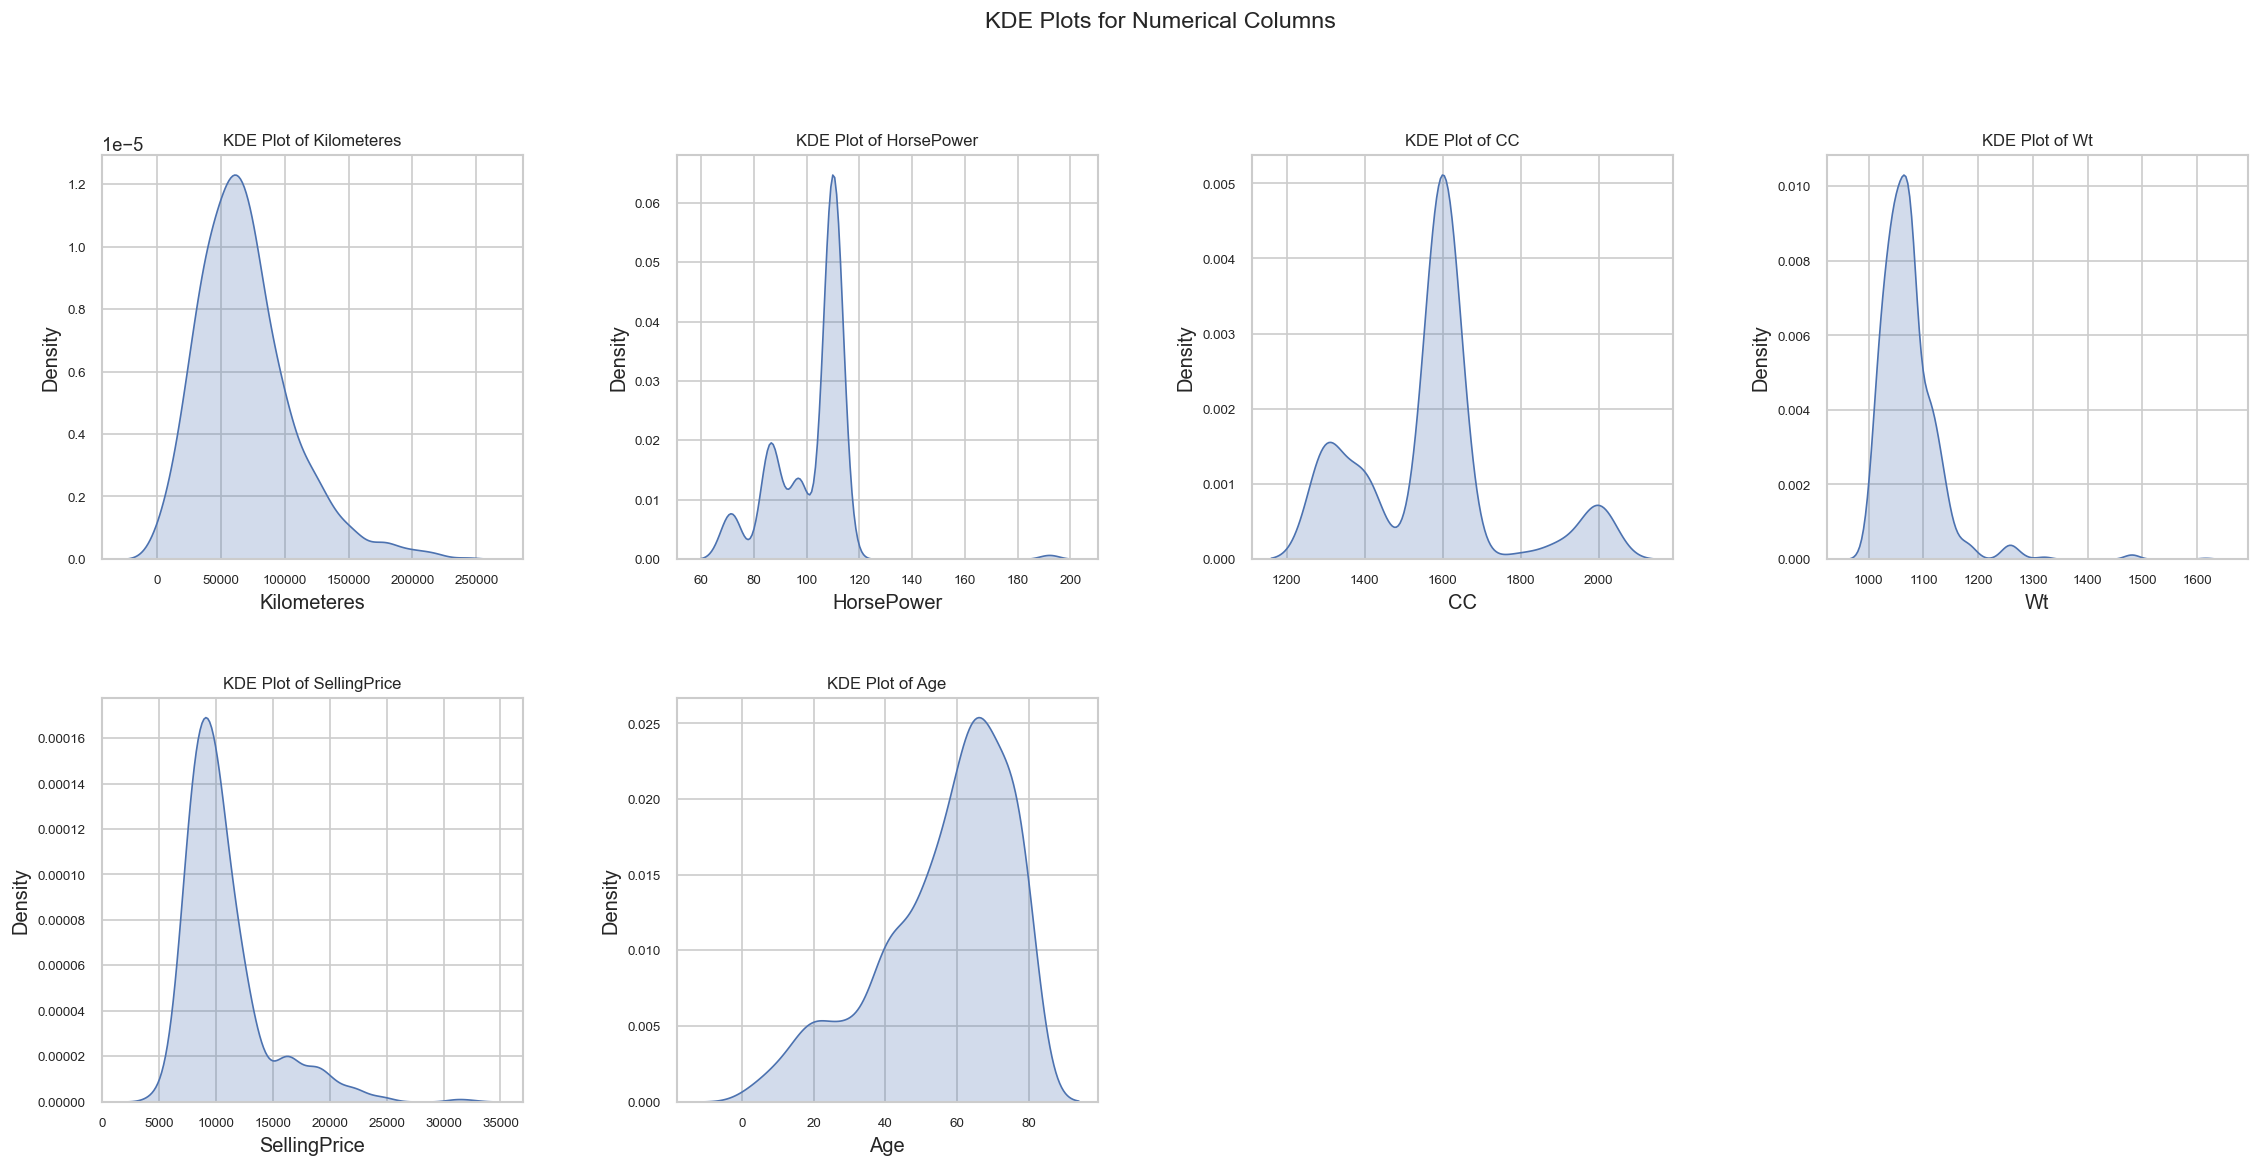

In [12]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Identify numerical columns
numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'SellingPrice', 'Age'] 

# Calculate the number of subplot rows needed
n = len(numerical_columns)
n_rows = n // 4 + (n % 4 > 0)

# Create a high-resolution figure
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows), dpi=120)
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns to create KDE plots
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot of {column}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplot areas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('KDE Plots for Numerical Columns', fontsize=14, y=1.02)  # Add a main title and adjust its position
plt.show()


### Q-Q Plots

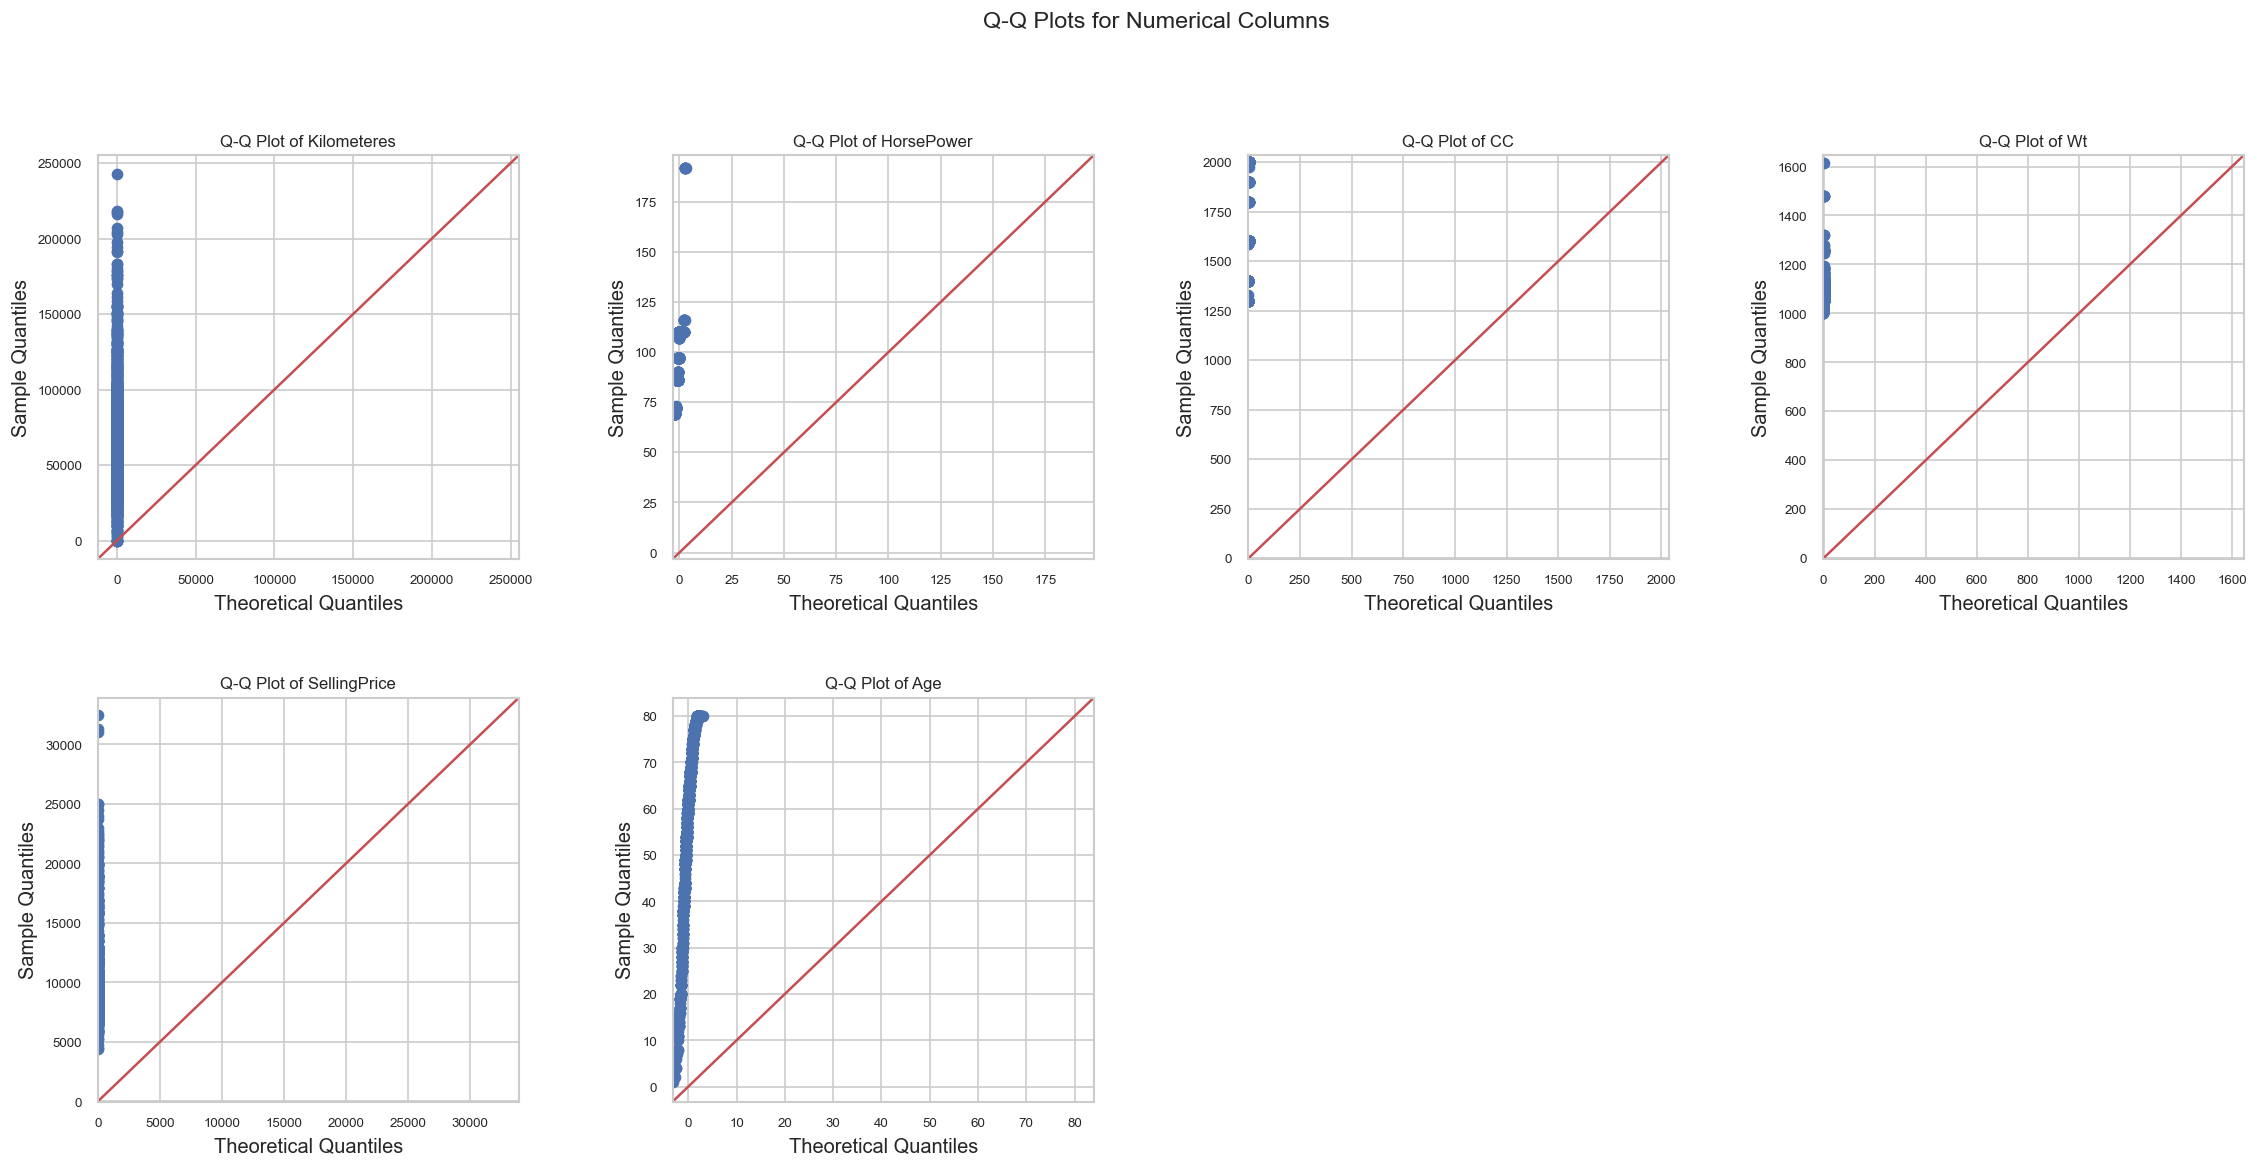

In [13]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Identify numerical columns
numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'SellingPrice', 'Age'] 

# Calculate the number of subplot rows needed
n = len(numerical_columns)
n_rows = n // 4 + (n % 4 > 0)

# Create a high-resolution figure
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows), dpi=120)
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns to create Q-Q plots
for i, column in enumerate(numerical_columns):
    sm.qqplot(df[column], line='45', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {column}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplot areas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('Q-Q Plots for Numerical Columns', fontsize=14, y=1.02)  # Add a main title and adjust its position
plt.show()


### Histograms and Boxplots

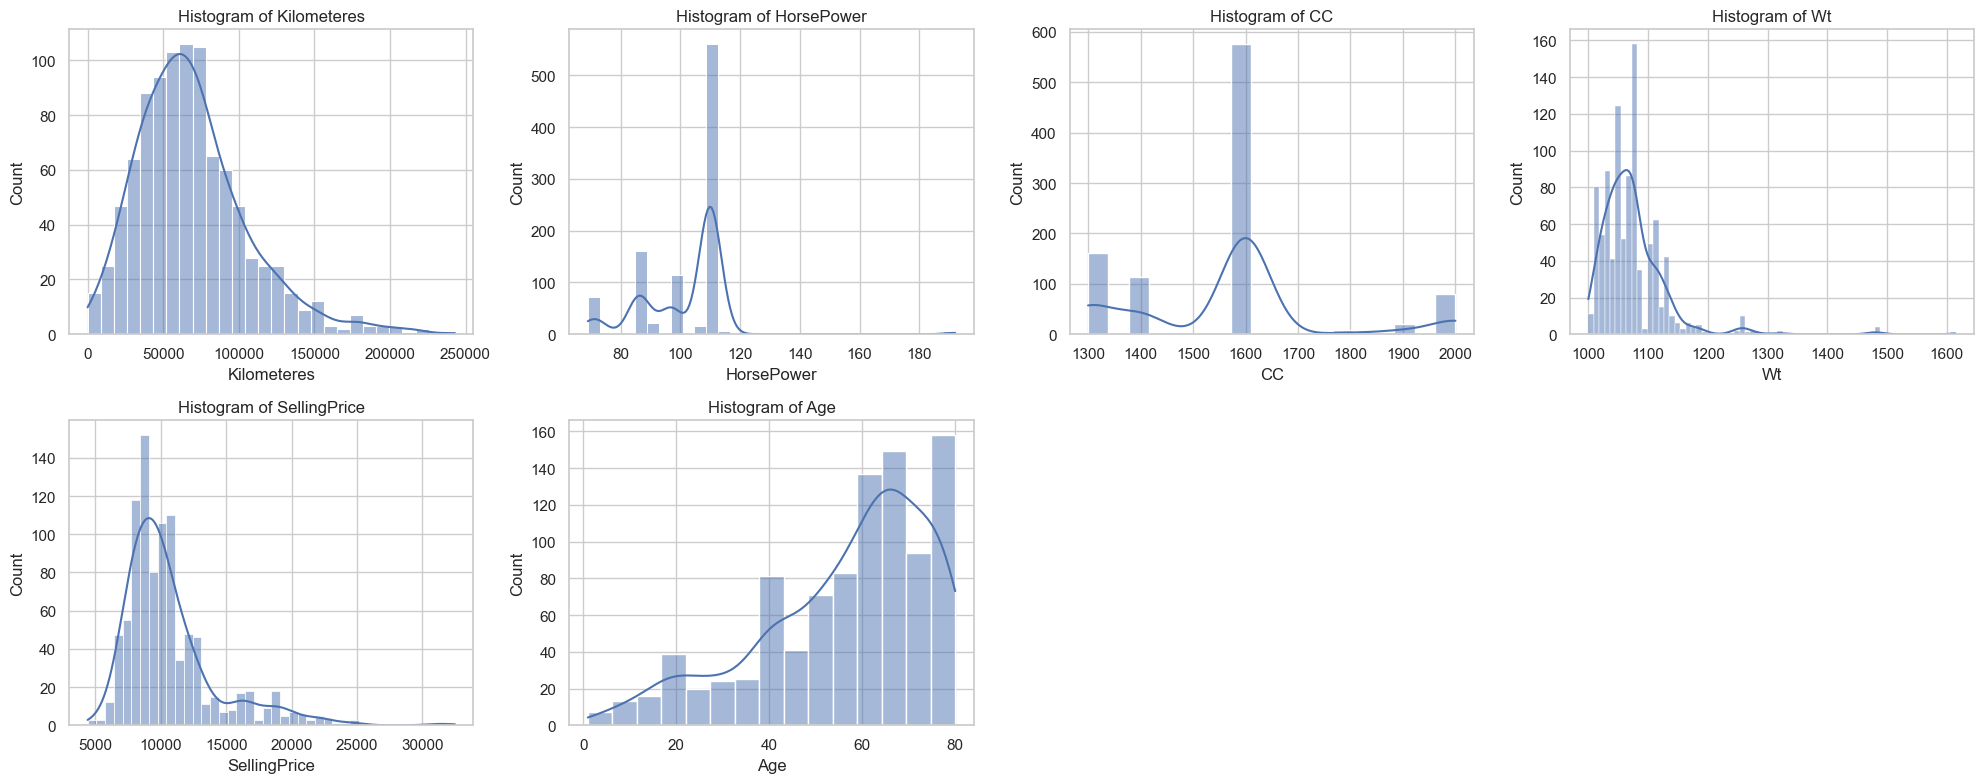

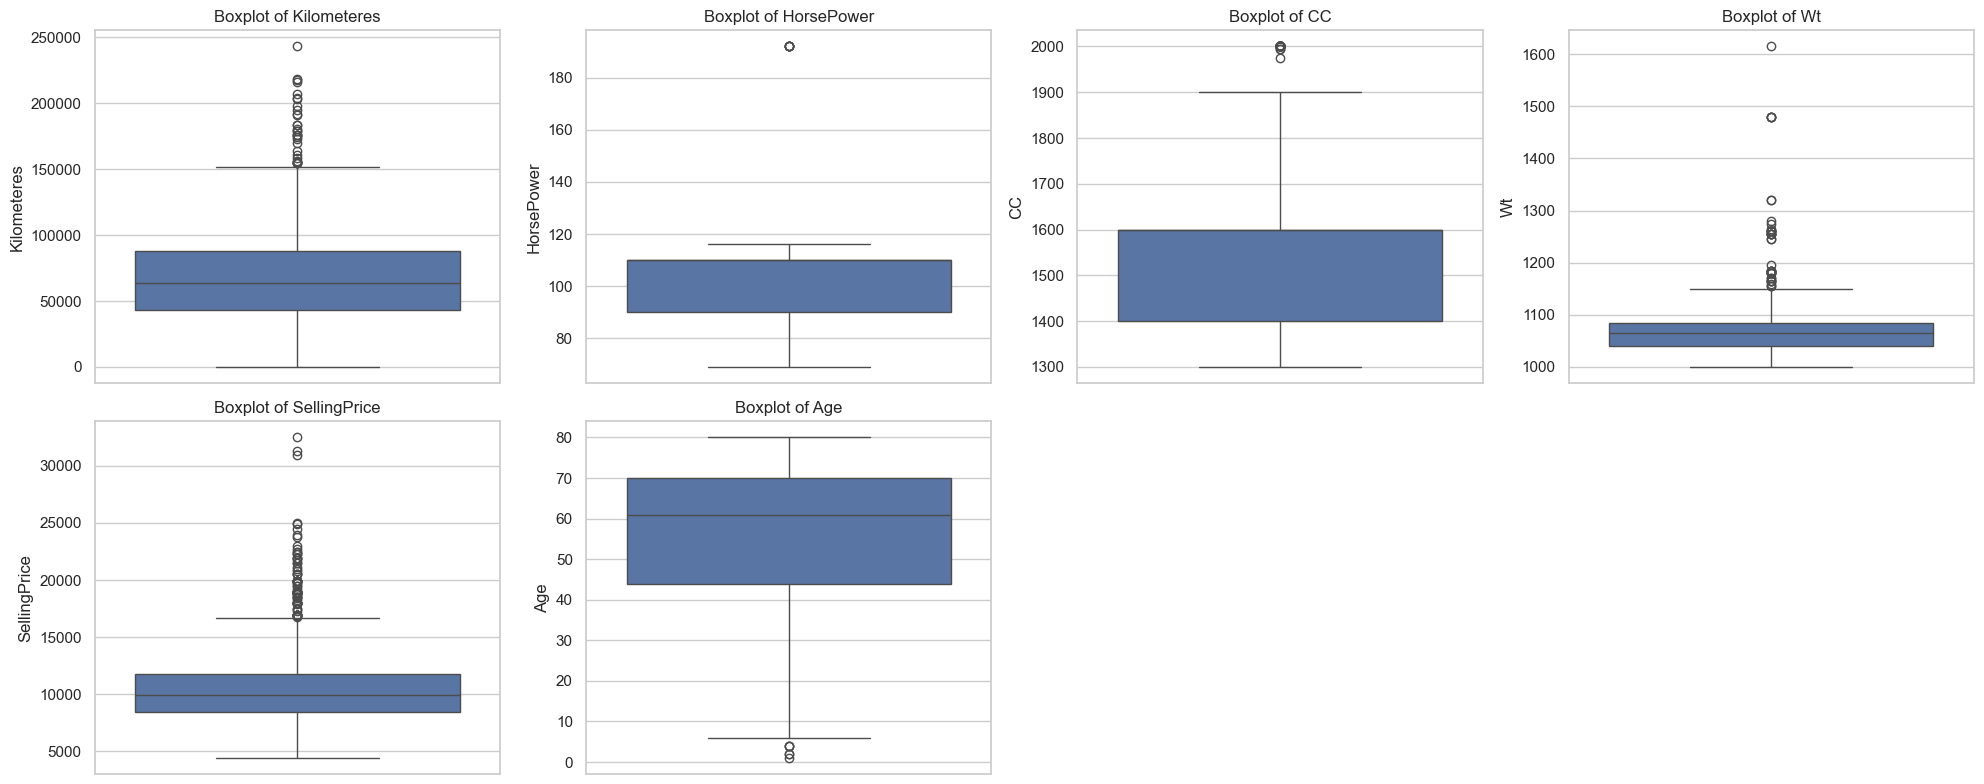

In [14]:
# Select numerical columns
numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'SellingPrice', 'Age'] 

# Define the layout size
n_cols = 4
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)

# Plotting Histograms with KDE
plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plotting Boxplots
plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Scatter Plots

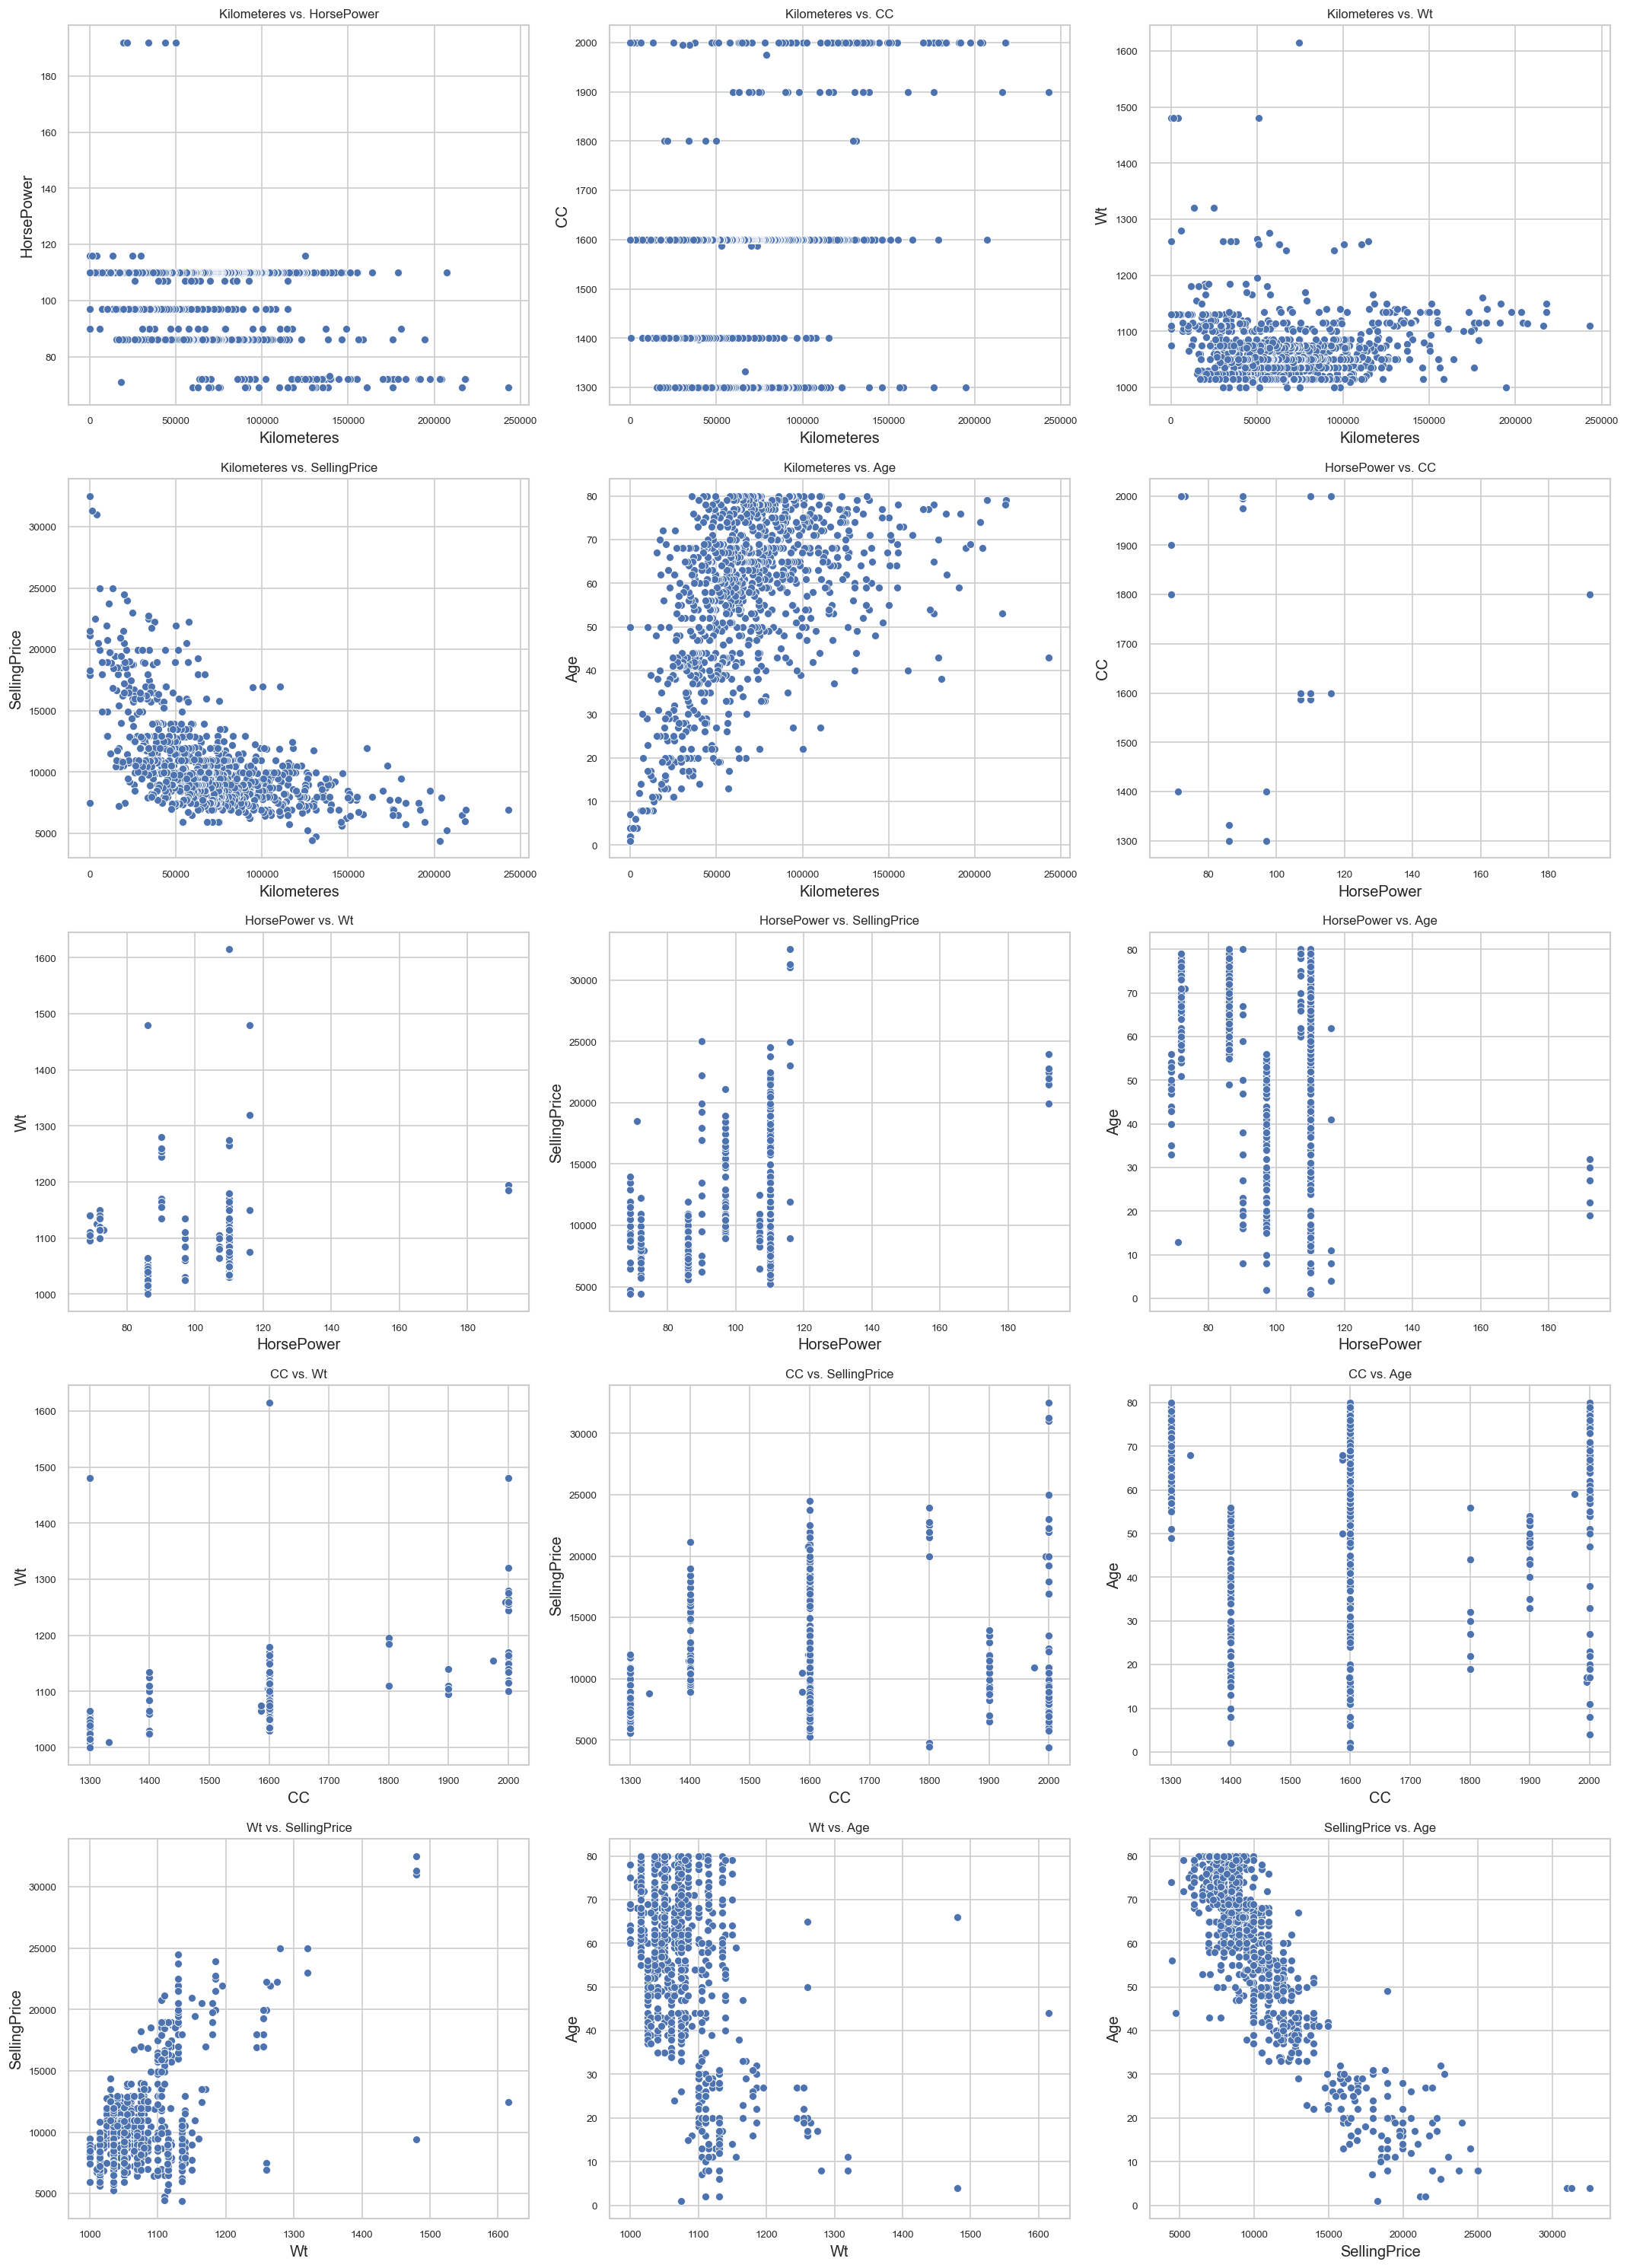

In [15]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Select a subset of numerical columns for scatter plots:
selected_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'SellingPrice', 'Age']  # Adjust based on your dataset

# Prepare combinations for unique pairwise comparisons
combinations = [(selected_columns[i], selected_columns[j]) for i in range(len(selected_columns)) for j in range(i+1, len(selected_columns))]

# Calculate the number of plots needed
n_plots = len(combinations)
n_cols = 3  # Number of columns in subplot grid
n_rows = n_plots // n_cols + (n_plots % n_cols > 0)  # Calculate the number of rows needed

# Create a figure for the scatter plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), dpi=120)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, (col1, col2) in enumerate(combinations):
    sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
    axes[i].set_title(f'{col1} vs. {col2}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplot axes if the number of combinations is not a multiple of n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Heatmap

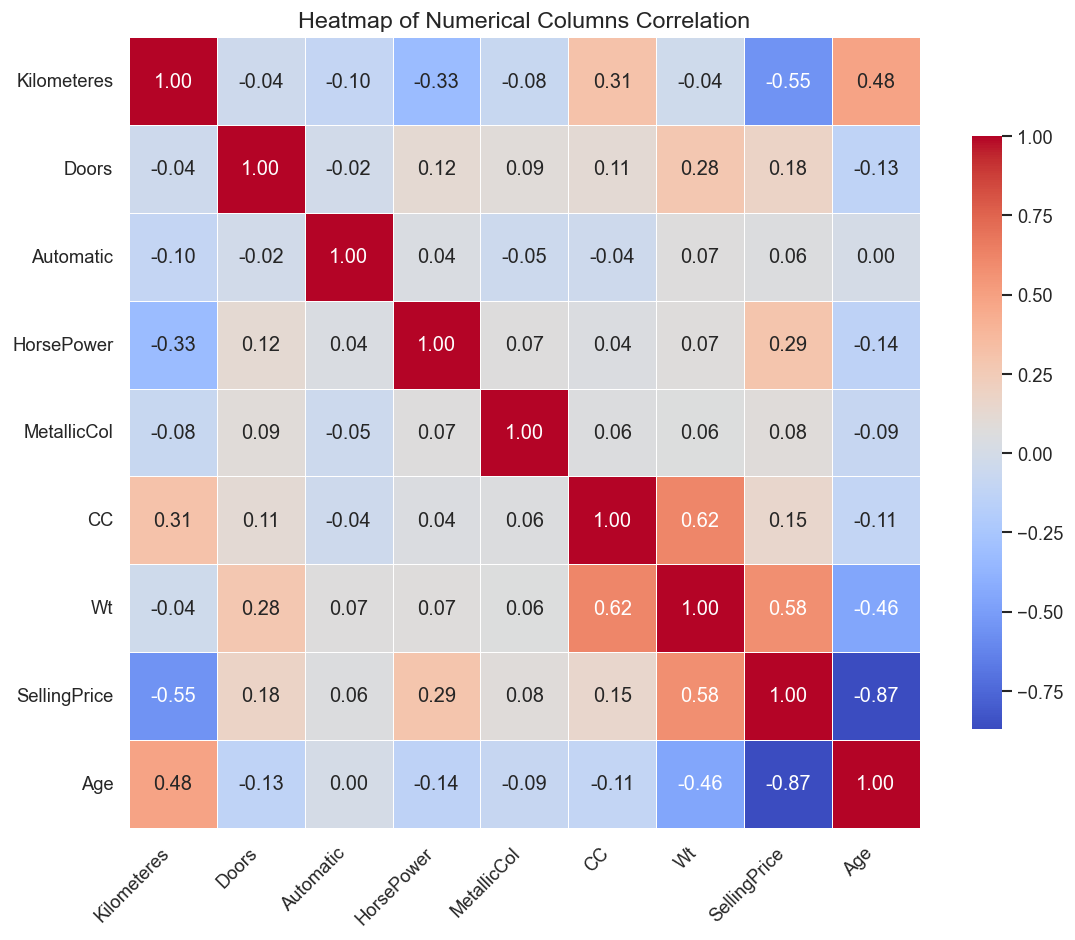

In [16]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="white")

# Calculate the correlation matrix for numerical columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8), dpi=120)  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Heatmap of Numerical Columns Correlation', fontsize=14)
plt.xticks(rotation=45, ha="right")  # Improve readability of x-axis labels
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


### Data Preprocessing

In [17]:
numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'Age'] 
categorical_columns = ['Fuel_Type', 'Doors', 'Automatic', 'MetallicCol']
label_column = 'SellingPrice'

# Normalize numerical columns to scale the data
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Apply Label Encoding to 'Doors' since it's ordinal
label_encoder = LabelEncoder()
df['Doors'] = label_encoder.fit_transform(df['Doors'])

# OneHotEncoder for 'Fuel_Type'
encoder = OneHotEncoder(drop=None)  # Corrected by removing the non-existent parameter
encoded_features = encoder.fit_transform(df[['Fuel_Type']])

# Convert to dense format if you need a dense matrix instead of a sparse one
encoded_features_dense = encoded_features.toarray()  # Converts the sparse matrix to a dense array

# Get feature names for the new columns
columns = encoder.get_feature_names_out(['Fuel_Type'])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features_dense, columns=columns)

# Concatenate with the original DataFrame
df = pd.concat([df.drop(['Fuel_Type'], axis=1), encoded_df], axis=1)

# 'Automatic' and 'MetallicCol' are already binary, no need to encode further.
# However, if you want to ensure they are of type 'category', you can do:
df['Automatic'] = df['Automatic'].astype('category')
df['MetallicCol'] = df['MetallicCol'].astype('category')

### **Saving the Encoders**

To use the encoders (like **`MinMaxScaler`**, **`LabelEncoder`**, and **`OneHotEncoder`**) during the prediction phase, it's crucial to save these fitted encoders after training and then load them back when making predictions. This ensures that the preprocessing during the prediction phase uses the same parameters as during the training phase.

In [28]:
import pickle

# Save the scaler
with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('../model/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the OneHot encoder
with open('../model/onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


### Loading the Encoders
When you need to use these encoders for processing new data (e.g., during prediction), you will load them from the saved files:

In [30]:
# Load the scaler
with open('../model/scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Load the label encoder
with open('../model/label_encoder.pkl', 'rb') as f:
    loaded_label_encoder = pickle.load(f)

# Load the OneHot encoder
with open('../model/onehot_encoder.pkl', 'rb') as f:
    loaded_onehot_encoder = pickle.load(f)


### Using Loaded Encoders

In [33]:
import pandas as pd

# Example new data
new_data = {
    'Kilometeres': [45000],
    'Doors': [2],
    'Automatic': [0],
    'HorsePower': [110],
    'MetallicCol': [1],
    'CC': [1500],
    'Wt': [950],
    'Age': [2],
    'Fuel_Type': ['Diesel']
}
new_df = pd.DataFrame(new_data)

# Applying the loaded transformations
new_df[numerical_columns] = loaded_scaler.transform(new_df[numerical_columns])
new_df['Doors'] = loaded_label_encoder.transform(new_df['Doors'])
new_encoded_features = loaded_onehot_encoder.transform(new_df[['Fuel_Type']])
new_encoded_features_dense = new_encoded_features.toarray()
columns = loaded_onehot_encoder.get_feature_names_out(['Fuel_Type'])
new_encoded_df = pd.DataFrame(new_encoded_features_dense, columns=columns)
new_df = pd.concat([new_df.drop(['Fuel_Type'], axis=1), new_encoded_df], axis=1)
new_df['Automatic'] = new_df['Automatic'].astype('category')
new_df['MetallicCol'] = new_df['MetallicCol'].astype('category')

In [34]:
new_df

,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.185182,0,0,0.333333,1,0.285714,-0.081301,0.012658,0.0,1.0,0.0


### **Final Checks**

- [ ] **Final Overview**: Use **`.head()`**, **`.info()`**, and **`.describe()`** to get an overview of the cleaned dataset, ensuring it's ready for model development.

In [18]:
df

,Kilometeres,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,SellingPrice,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.193355,1,0,0.170732,1,1.000000,0.268293,13500,0.278481,0.0,1.0,0.0
1,0.389347,1,0,0.170732,1,1.000000,0.398374,16900,0.329114,0.0,1.0,0.0
2,0.081066,1,0,1.000000,0,0.714286,0.300813,21500,0.329114,0.0,0.0,1.0
3,0.179462,1,0,1.000000,0,0.714286,0.300813,19950,0.265823,0.0,0.0,1.0
4,0.140453,1,0,1.000000,1,0.714286,0.300813,22500,0.392405,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
953,0.147408,1,1,0.138211,0,0.000000,0.024390,7950,1.000000,0.0,0.0,1.0
954,0.106992,1,0,0.138211,0,0.000000,0.024390,8450,0.898734,0.0,0.0,1.0
955,0.084539,1,0,0.138211,1,0.000000,0.040650,7500,0.860759,0.0,0.0,1.0
956,0.078186,1,0,0.138211,0,0.000000,0.024390,10845,0.898734,0.0,0.0,1.0


In [19]:
df.columns

Index(['Kilometeres', 'Doors', 'Automatic', 'HorsePower', 'MetallicCol', 'CC',
       'Wt', 'SellingPrice', 'Age', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [20]:
df.describe()

,Kilometeres,Doors,HorsePower,CC,Wt,SellingPrice,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,0.284226,2.009395,0.264627,0.380931,0.118214,10666.893528,0.702069,0.011482,0.105428,0.883090
std,0.152604,0.955059,0.118344,0.264072,0.089814,3633.781940,0.232051,0.106594,0.307264,0.321481
min,0.000000,0.000000,0.000000,0.000000,0.000000,4400.000000,0.000000,0.000000,0.000000,0.000000
25%,0.178894,1.000000,0.170732,0.142857,0.065041,8450.000000,0.544304,0.000000,0.000000,1.000000
50%,0.261507,2.000000,0.333333,0.428571,0.105691,9900.000000,0.759494,0.000000,0.000000,1.000000
75%,0.360409,3.000000,0.333333,0.428571,0.138211,11750.000000,0.873418,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,32500.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Kilometeres       958 non-null    float64 
 1   Doors             958 non-null    int64   
 2   Automatic         958 non-null    category
 3   HorsePower        958 non-null    float64 
 4   MetallicCol       958 non-null    category
 5   CC                958 non-null    float64 
 6   Wt                958 non-null    float64 
 7   SellingPrice      958 non-null    int64   
 8   Age               958 non-null    float64 
 9   Fuel_Type_CNG     958 non-null    float64 
 10  Fuel_Type_Diesel  958 non-null    float64 
 11  Fuel_Type_Petrol  958 non-null    float64 
dtypes: category(2), float64(8), int64(2)
memory usage: 77.1 KB


# **Phase 2: Machine Learning Model Development**

## **Training Data Preparing**

This code performs the following operations:

- [ ] Splits the data into feature (**`X`**) and label (**`y`**) arrays.
- [ ] Uses **`train_test_split`** twice to create a train set (60% of the data), a validation set (20%), and a test set (20%).
- [ ] Saves the training, validation, and test sets to an **`.npz`** file, which can then be loaded for training.


In [22]:
# Identify features and label
X = df.drop(['SellingPrice'], axis=1)  # Features
y = df['SellingPrice']  # Label

# First split into training and temporary sets (temp will become validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now we have X_train, y_train, X_val, y_val, X_test, and y_test

# Save the arrays as .npz file
np.savez('../data/dataset.npz', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

# Confirm the file has been saved
print("Arrays saved as dataset.npz")

Arrays saved as dataset.npz


## Model Training

In [23]:
# Create a linear regression object
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation and  Predictions

In [24]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate MSE 
mse_val = mean_squared_error(y_val, y_val_pred)
# Calculate R-squared
r2_val = r2_score(y_val, y_val_pred)
# Calculate MAE
mae_val = mean_squared_error(y_val, y_val_pred, squared=False)
# Calculate MAPE - Note: We handle zero division issues explicitly
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val).replace(np.inf, np.nan)) * 100
# Calculate RMSE
rmse_val = mean_squared_error(y_val, y_val_pred, squared=True)

print(f"Validation MSE: {mse_val}")
print(f"Validation R^2: {r2_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}%")
print(f"Validation RMSE: {rmse_val}")

Validation MSE: 1329989.7611529487
Validation R^2: 0.8555032268729931
Validation MAE: 1153.2518203553589
Validation MAPE: 9.147071789597232%
Validation RMSE: 1329989.7611529487


/opt/miniconda3/envs/car-price-pred-mlops-aws/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/car-price-pred-mlops-aws/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Save the Model as a Pickle File

In [25]:
# Save the model to disk as a pickle file
filename = '../model/finalized_linear_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as", filename)

Model saved successfully as ../model/finalized_linear_model.pkl


## Load the Model and Make Predictions

In [26]:
# Load the model from disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use loaded_model to make predictions
# For example, predict on the test set if needed
y_test_pred = loaded_model.predict(X_test)

# Optionally calculate and print metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")


Test MSE: 1476933.4881810772


# **Phase 3: Model Deployment**

In [ ]:
## Pre-processing


# Load the dataset
df = pd.read_csv("../model/train.csv")
# Droping index col
df = df.drop('Unnamed: 0', axis=1)

numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'Age'] 
categorical_columns = ['Fuel_Type', 'Doors', 'Automatic', 'MetallicCol']
label_column = 'SellingPrice'

# Normalize numerical columns to scale the data
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Apply Label Encoding to 'Doors' since it's ordinal
label_encoder = LabelEncoder()
df['Doors'] = label_encoder.fit_transform(df['Doors'])

# Apply One-Hot Encoding to 'Fuel_Type' since it's nominal
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False, dtype=int)

# 'Automatic' and 'MetallicCol' are already binary, no need to encode further.
# However, if you want to ensure they are of type 'category', you can do:
df['Automatic'] = df['Automatic'].astype('category')
df['MetallicCol'] = df['MetallicCol'].astype('category')


# Identify features and label
X = df.drop(['SellingPrice'], axis=1)  # Features
y = df['SellingPrice']  # Label

# First split into training and temporary sets (temp will become validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now we have X_train, y_train, X_val, y_val, X_test, and y_test

# Save the arrays as .npz file
np.savez('../data/dataset.npz', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

# Confirm the file has been saved
print("Arrays saved as dataset.npz")


## Model Training


# Create a linear regression object
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)


## Model evaluating


# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate MSE 
mse_val = mean_squared_error(y_val, y_val_pred)
# Calculate R-squared
r2_val = r2_score(y_val, y_val_pred)
# Calculate MAE
mae_val = mean_squared_error(y_val, y_val_pred, squared=False)
# Calculate MAPE - Note: We handle zero division issues explicitly
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val).replace(np.inf, np.nan)) * 100
# Calculate RMSE
rmse_val = mean_squared_error(y_val, y_val_pred, squared=True)

print(f"Validation MSE: {mse_val}")
print(f"Validation R^2: {r2_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}%")
print(f"Validation RMSE: {rmse_val}")


## Model saving

# Save the model to disk as a pickle file
filename = '../model/finalized_linear_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as", filename)

`
mkdir lambda-ct-pipeline
cd lambda-ct-pipeline
python3 -m venv venv
source venv/bin/activate
pip install pandas numpy scikit-learn boto3
vi lambda_function.py
cd $VIRTUAL_ENV/lib/python3.9/site-packages/
zip -r9 ${OLDPWD}/lambda-ct-pipeline.zip .
cd $OLDPWD
zip -g lambda-ct-pipeline.zip ct_lambda_function.py

aws s3api create-bucket --bucket car-price-pred-mlops --region ap-south-1 --create-bucket-configuration LocationConstraint=ap-south-1

aws s3 cp lambda-ct-pipeline.zip s3://car-price-pred-mlops/lambda-ct-pipeline

`

`
mkdir lambda-model-endpoint
cd lambda-model-endpoint
python3 -m venv venv
source venv/bin/activate
pip install scikit-learn boto3 pandas
vi model_endpoint_lambda_function.py
cd $VIRTUAL_ENV/lib/python3.9/site-packages/
zip -r9 ${OLDPWD}/lambda-model-endpoint.zip .
cd $OLDPWD
zip -g lambda-model-endpoint.zip model_endpoint_lambda_function.py

aws s3api create-bucket --bucket car-price-pred-mlops --region ap-south-1 --create-bucket-configuration LocationConstraint=ap-south-1

aws s3 cp lambda-model-endpoint.zip s3://car-price-pred-mlops/lambda-model-endpoint.zip

`

In [ ]:
!aws s3 ls

In [ ]:
s3_client = boto3.client('s3')

In [ ]:
bucket = 'car-price-pred-mlops'
object_key = 'finalized_linear_model.pkl'
    
response = s3_client.get_object(Bucket=bucket, Key=object_key)
model_str = response['Body'].read()
model = pickle.loads(model_str)

In [ ]:
model

In [ ]:
import json
import boto3
import pickle
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Initialize clients


def load_model():
    # Location of the model in S3
    s3_client = boto3.client('s3')
    bucket = 'car-price-pred-mlops'
    object_key = 'finalized_linear_model.pkl'
    
    response = s3_client.get_object(Bucket=bucket, Key=object_key)
    model_str = response['Body'].read()
    model = pickle.loads(model_str)
    return model

def lambda_handler(event):
    # Load model
    model = load_model()
    
    # Load incoming JSON data
    car_data = json.loads(event['body'])
    df = pd.DataFrame([car_data])
    
    # Assuming pre-fitted scalers and encoders are available; else, load them similarly as the model
    # For this example, we'll assume you'll manage to refit them here (not ideal for production)
    numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'Age'] 
    categorical_columns = ['Fuel_Type', 'Doors', 'Automatic', 'MetallicCol']
    print(df)
    
    # Pre-processing
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    label_encoder = LabelEncoder()
    df['Doors'] = label_encoder.fit_transform(df['Doors'])
    
    df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False, dtype=int)
    df['Automatic'] = df['Automatic'].astype('category')
    df['MetallicCol'] = df['MetallicCol'].astype('category')
    print(df)
    
    # Make predictions
    X = df.drop('SellingPrice', axis=1, errors='ignore')
    prediction = model.predict(X)
    
    # Create JSON response
    response = {
        'statusCode': 200,
        'body': json.dumps({'predicted_price': prediction.tolist()})
    }
    
    return response

In [37]:
event = {
    "body": "{\"Kilometeres\": 85000, \"HorsePower\": 150, \"CC\": 1800, \"Wt\": 1200, \"Age\": 5, \"Fuel_Type\": \"Petrol\", \"Doors\": \"Four\", \"Automatic\": \"Yes\", \"MetallicCol\": \"No\"}"
}


In [38]:
event

{'body': '{"Kilometeres": 85000, "HorsePower": 150, "CC": 1800, "Wt": 1200, "Age": 5, "Fuel_Type": "Petrol", "Doors": "Four", "Automatic": "Yes", "MetallicCol": "No"}'}

In [ ]:
response1 = lambda_handler(event)

In [1]:
import json
import boto3
import pickle
import pandas as pd

def load_from_s3(bucket, object_key):
    # Helper function to load objects from S3
    s3_client = boto3.client('s3')
    response = s3_client.get_object(Bucket=bucket, Key=object_key)
    object_bytes = response['Body'].read()
    return pickle.loads(object_bytes)

def lambda_handler(event):
    # Constants
    BUCKET = 'car-price-pred-mlops'
    
    # Load the model and encoders
    model = load_from_s3(BUCKET, 'finalized_linear_model.pkl')
    scaler = load_from_s3(BUCKET, 'scaler.pkl')
    label_encoder = load_from_s3(BUCKET, 'label_encoder.pkl')
    onehot_encoder = load_from_s3(BUCKET, 'onehot_encoder.pkl')
    
    # Load incoming JSON data
    car_data = json.loads(event['body'])
    df = pd.DataFrame([car_data])
    
    # Print initial data frame
    print("Initial DataFrame:", df)
    
    # Pre-processing
    numerical_columns = ['Kilometeres', 'HorsePower', 'CC', 'Wt', 'Age'] 
    categorical_columns = ['Fuel_Type', 'Doors', 'Automatic', 'MetallicCol']

    # Apply the scaler
    df[numerical_columns] = scaler.transform(df[numerical_columns])
    
    # Apply label encoder
    df['Doors'] = label_encoder.transform(df['Doors'])
    
    # Apply one-hot encoder
    encoded_features = onehot_encoder.transform(df[['Fuel_Type']])
    encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=onehot_encoder.get_feature_names_out(['Fuel_Type']))
    df = pd.concat([df.drop('Fuel_Type', axis=1), encoded_features_df], axis=1)
    
    # Ensure 'Automatic' and 'MetallicCol' are treated as categorical
    df['Automatic'] = df['Automatic'].astype('category')
    df['MetallicCol'] = df['MetallicCol'].astype('category')
    
    # Print processed data frame
    print("Processed DataFrame:", df)
    
    # Make predictions
    X = df.drop('SellingPrice', axis=1, errors='ignore')  # Ensure 'SellingPrice' is excluded if present
    prediction = model.predict(X)
    
    # Create JSON response
    response = {
        'statusCode': 200,
        'body': json.dumps({'predicted_price': prediction.tolist()})
    }
    
    return response


In [2]:
event = {
    "body": "{\"Kilometeres\": 45000, \"Doors\": 2, \"Automatic\": 0, \"HorsePower\": 110, \"MetallicCol\": 1, \"CC\": 1500, \"Wt\": 950, \"Age\": 2, \"Fuel_Type\": \"Diesel\"}"
}


In [3]:
event

{'body': '{"Kilometeres": 45000, "Doors": 2, "Automatic": 0, "HorsePower": 110, "MetallicCol": 1, "CC": 1500, "Wt": 950, "Age": 2, "Fuel_Type": "Diesel"}'}

In [4]:
response1 = lambda_handler(event)

Initial DataFrame:    Kilometeres  Doors  Automatic  HorsePower  MetallicCol    CC   Wt  Age  \
0        45000      2          0         110            1  1500  950    2   

  Fuel_Type  
0    Diesel  
Processed DataFrame:    Kilometeres  Doors Automatic  HorsePower MetallicCol        CC        Wt  \
0     0.185182      0         0    0.333333           1  0.285714 -0.081301   

        Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0  0.012658            0.0               1.0               0.0  


In [5]:
response1

{'statusCode': 200, 'body': '{"predicted_price": [19452.6375965354]}'}

In [ ]:
event = {
    "body": "{\"Kilometeres\": 45000, \"Doors\": 2, \"Automatic\": 0, \"HorsePower\": 110, \"MetallicCol\": 1, \"CC\": 1500, \"Wt\": 950, \"Age\": 2, \"Fuel_Type\": \"Diesel\"}"
}


```bash

aws ecr get-login-password --region ap-south-1 | docker login --username AWS --password-stdin 637423276370.dkr.ecr.ap-south-1.amazonaws.com

aws ecr create-repository --repository-name lambda-function-repo --region ap-south-1

docker tag lambda-function-image:latest 637423276370.dkr.ecr.ap-south-1.amazonaws.com/lambda-function-repo:latest


docker push 637423276370.dkr.ecr.ap-south-1.amazonaws.com/lambda-function-repo:latest


aws lambda create-function --function-name model-endpoint-v2 \
    --package-type Image \
    --code ImageUri=637423276370.dkr.ecr.ap-south-1.amazonaws.com/lambda-function-repo:latest \
    --role arn:aws:iam::637423276370:role/model-endpoint-lambda \
    --region ap-south-1 \
    --architectures arm64 \
    --timeout 120 \
    --memory-size 1024



aws lambda invoke \
    --function-name model-endpoint-v2 \
    --payload '{"body": "{\"Kilometeres\": 45000, \"Doors\": 2, \"Automatic\": 0, \"HorsePower\": 110, \"MetallicCol\": 1, \"CC\": 1500, \"Wt\": 950, \"Age\": 2, \"Fuel_Type\": \"Diesel\"}"}' \
    response.json
    
    
aws lambda invoke \
    --function-name model-endpoint-v2 \
    --payload """{'body': '{"Kilometeres": 45000, "Doors": 2, "Automatic": 0, "HorsePower": 110, "MetallicCol": 1, "CC": 1500, "Wt": 950, "Age": 2, "Fuel_Type": "Diesel"}'}""" \
    response.json
```